In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data = pd.read_csv('data/Customer Data.csv', index_col='CUST_ID')


In [4]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [155]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [156]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [157]:
data[['PAYMENTS', 'MINIMUM_PAYMENTS']][data['MINIMUM_PAYMENTS'].isna()].describe()

,PAYMENTS,MINIMUM_PAYMENTS
count,313.000000,0.0
mean,322.286168,NaN
std,1996.658905,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.000000,NaN
75%,0.000000,NaN
max,29272.486070,NaN


In [158]:
data[['PAYMENTS', 'MINIMUM_PAYMENTS']].describe()

,PAYMENTS,MINIMUM_PAYMENTS
count,8950.000000,8637.000000
mean,1733.143852,864.206542
std,2895.063757,2372.446607
min,0.000000,0.019163
25%,383.276166,169.123707
50%,856.901546,312.343947
75%,1901.134317,825.485459
max,50721.483360,76406.207520


Видно, что распределения у payments при пустых значениях minimum_payments разные, предположу, что это говорит об отсутсвии минимального платежа, возможно долг закрыт, поэтому заполнять буду **0** и добавлю missing flag на случай, если все таки мминимальный платеж реально равен 0

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

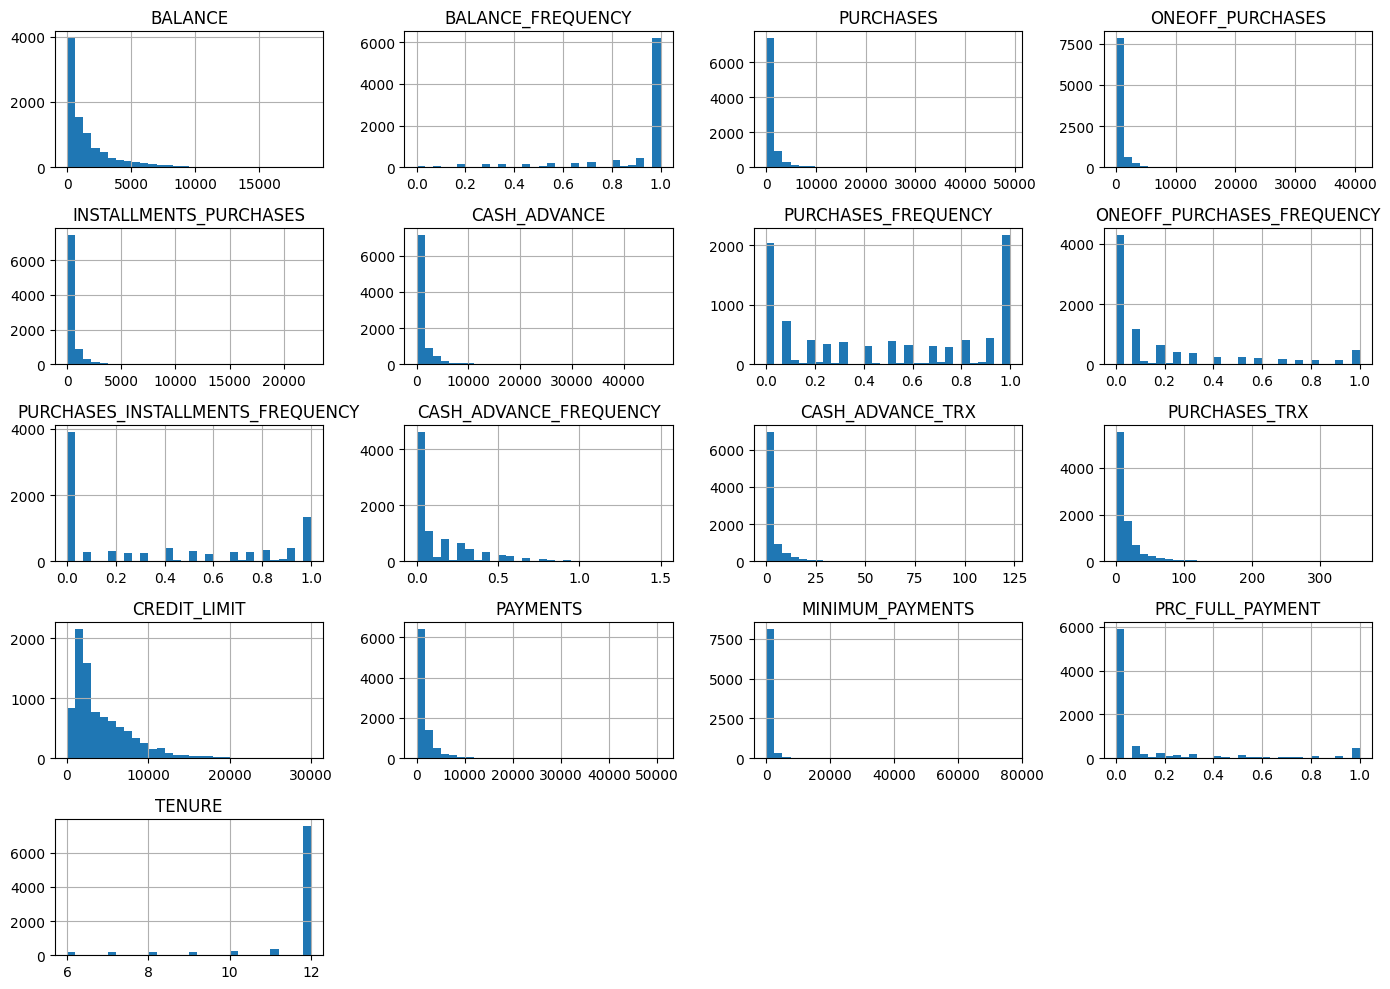

In [160]:
import matplotlib.pyplot as plt

data.hist(bins=30, figsize=(14, 10))
plt.tight_layout()
plt.show()

In [161]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Разделяем признаки по их распределению, тк для них требуется разный подход для preprocessing
- Большая часть признаков скошена и имеет выбросы
- Есть дискретные признаки
- Частотные признаки(значения от 0 до 1) - не подходит для логарифмирования

In [162]:
amount_features = [
    "BALANCE", "PURCHASES", "ONEOFF_PURCHASES",
    "INSTALLMENTS_PURCHASES", "CASH_ADVANCE",
    "PAYMENTS", "CREDIT_LIMIT"
] # - непрерывные значения, количество денег

count_features = [
    "PURCHASES_TRX", "CASH_ADVANCE_TRX"
] # - дискретные значения

frequency_features = [
    "BALANCE_FREQUENCY", "PURCHASES_FREQUENCY",
    "ONEOFF_PURCHASES_FREQUENCY",
    "PURCHASES_INSTALLMENTS_FREQUENCY",
    "CASH_ADVANCE_FREQUENCY",
    "PRC_FULL_PAYMENT"
] # - частоты - значения от 0 до 1


minpay_feature = ["MINIMUM_PAYMENTS"]

# low_info = ["TENURE"]

Тк значения скошены - буду использовать логарифмирование, а из-за наличия выбросов выберу RobustScaler вместо StandardScaler
Удалять выбросы не буду тк они важные, ведь речь идет о финансах и выбросы это просто редкие и часто ценные клиенты

In [163]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.decomposition import PCA

log1p = FunctionTransformer(np.log1p, feature_names_out="one-to-one")
drop_features = ["TENURE"]

preprocess = ColumnTransformer(
    transformers=[
        ("amount", Pipeline([
            ("impute", SimpleImputer(strategy="median")),
            ("log", log1p),
            ("scale", RobustScaler())
        ]), amount_features),

        ("count", Pipeline([
            ("impute", SimpleImputer(strategy="median")),
            ("log", log1p),
            ("scale", RobustScaler())
        ]), count_features),

        ("freq", Pipeline([
            ("impute", SimpleImputer(strategy="median")),
            ("scale", RobustScaler())
        ]), frequency_features),

        ("minpay", Pipeline([
            ("impute0_flag", SimpleImputer(strategy="constant", fill_value=0, add_indicator=True)),
            ("log", log1p),
            ("scale", RobustScaler())
        ]), minpay_feature),

        ("drop", "drop", drop_features),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

preprocess_with_pca = Pipeline([
    ('preprocess', preprocess),
    ('pca', PCA(n_components=0.9, random_state=42)) # сохраняем 90% диспресиии
])

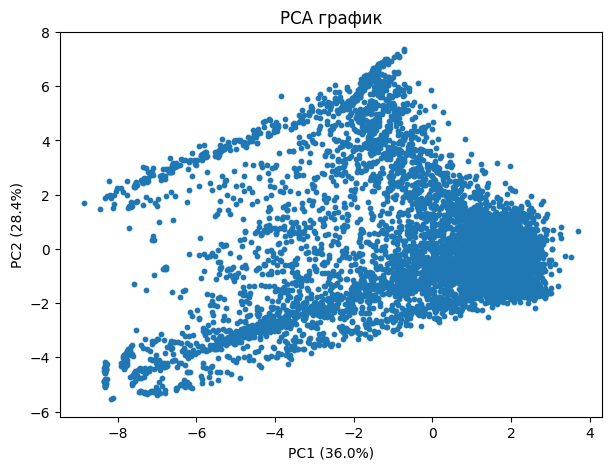

In [164]:
X_prep = preprocess.fit_transform(data)

pca2 = PCA(n_components=2, random_state=42) # 2 направления
Z = pca2.fit_transform(X_prep)

plt.figure(figsize=(7, 5))
plt.scatter(Z[:, 0], Z[:, 1], s=10)
plt.xlabel(f"PC1 ({pca2.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca2.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA график")
plt.show()

PCA показывает, что распределение очень скученное, поэтому модели основанные на плотности(вроде DBSCAN) врядли подойдут

#### Краткая информация о моделях:

**KMeans** - Разбивает данные на k кластеров, минимизируя расстояние точек до центров (centroids)

**DBSCAN** - Находит кластеры как области высокой плотности и помечает редкие точки как шум.

**HDBSCAN** - Иерархическая версия DBSCAN, автоматически подбирает плотности. Не требует eps

**Agglomerative Clustering** - Иерархическая кластеризация: сначала каждая точка — кластер, затем они постепенно объединяются.


**Gaussian Mixture** - Модель предполагает, что данные — смесь нескольких гауссиан.

**Spectral Clustering**  - Использует графовую интерпретацию данных и спектр лапласиана.

k-means - silhoute: 0.3137439469034648 davies: 1.0789823065466948 calinski 4730.613863660922


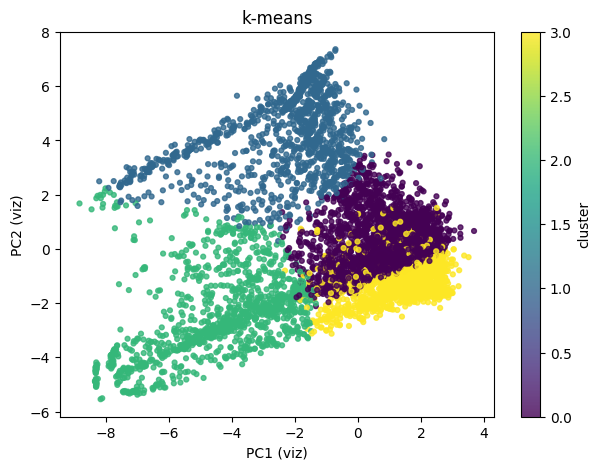

dbscan - silhoute: -0.4828750604266561 davies: 1.3890786376061488 calinski 57.60006119204366


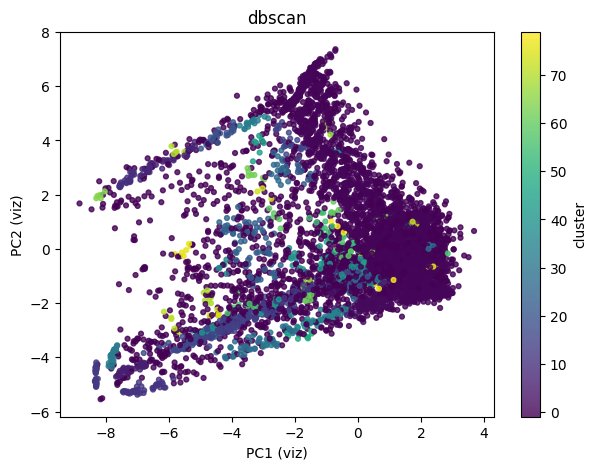

hdbscan - silhoute: -0.30169337947392666 davies: 1.3038051544978302 calinski 74.837051508097


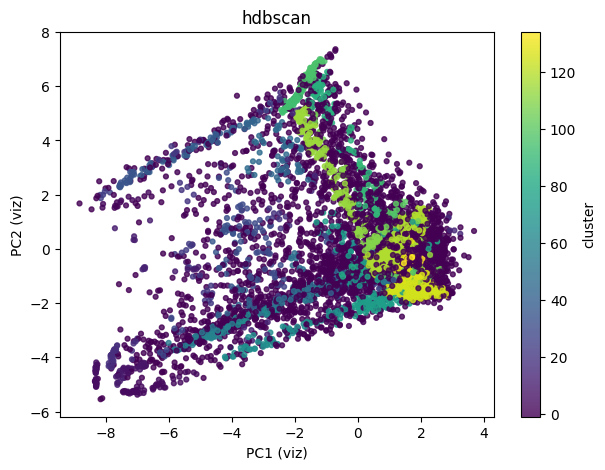

agglo - silhoute: 0.28588974438964176 davies: 1.0785623306629293 calinski 4211.522901159697


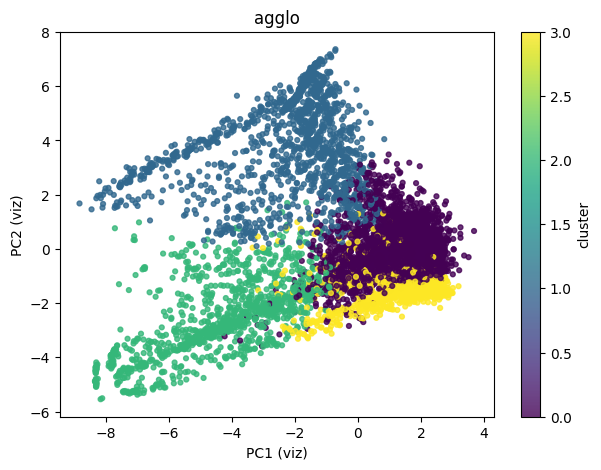

gauss - silhoute: 0.11782313653078295 davies: 2.0779182956569553 calinski 1467.2334929536662


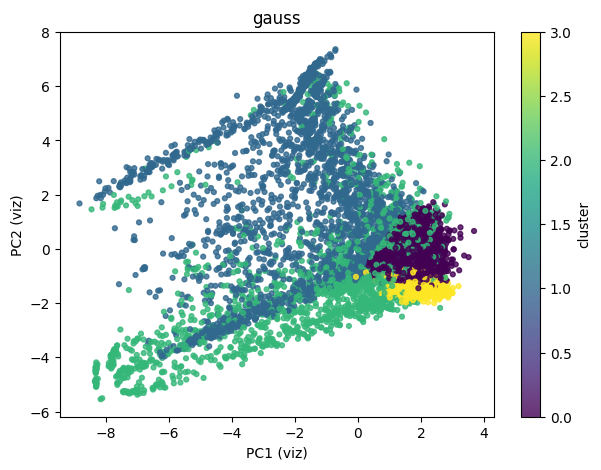

spectral - silhoute: 0.3886231580104046 davies: 0.9709868273439626 calinski 1882.9620139787096


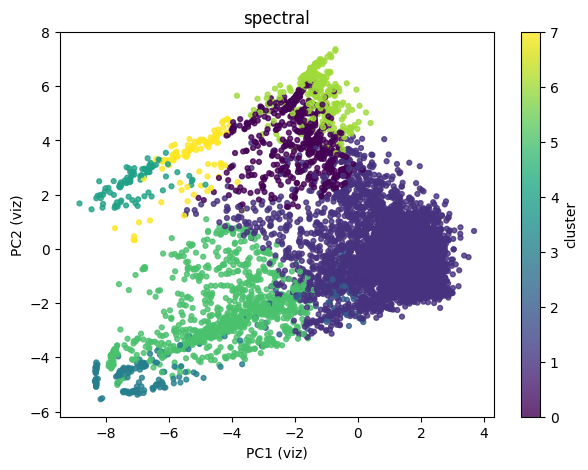

In [165]:
from sklearn.cluster import DBSCAN, KMeans, HDBSCAN, AgglomerativeClustering, SpectralClustering

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA


models = {
    'k-means': KMeans(n_clusters=4, n_init="auto", random_state=42),
    'dbscan': DBSCAN(eps=0.6, min_samples=5),
    'hdbscan': HDBSCAN(),
    'agglo': AgglomerativeClustering(n_clusters=4),
    'gauss': GaussianMixture(n_components=4,covariance_type="full", random_state=42),
    'spectral': SpectralClustering()
}


viz_2d = Pipeline(steps=[
    ("preprocess", preprocess),
    ("pca2", PCA(n_components=2, random_state=42)),
])
Z2 = viz_2d.fit_transform(data)


for name, model in models.items():
    pipe = Pipeline([
        ('preproc', preprocess_with_pca), 
        ('model', model)
    ])
    processed_data = preprocess_with_pca.fit_transform(data)
    labels = pipe.fit_predict(data)
    score1 = silhouette_score(processed_data, labels)
    score2 = davies_bouldin_score(processed_data, labels)
    score3 = calinski_harabasz_score(processed_data, labels)
    
    print(name, '- silhoute:', score1, 'davies:', score2, 'calinski', score3)

    plt.figure(figsize=(7, 5))
    sc = plt.scatter(
        Z2[:, 0], Z2[:, 1],
        c=labels,
        s=12,
        alpha=0.8
    )
    plt.xlabel("PC1 (viz)")
    plt.ylabel("PC2 (viz)")
    plt.title(name)
    plt.colorbar(sc, label="cluster")
    plt.show()

По графикам и метрикам видно, что самыми оптимальными моделями являются: K-Means, Spectral, Agglo
Но Spectral плох для практического решения задач, тк при разделении на кластеры он не ориентируется на центры
Соотвесвтенно он не оценивает "суть", а просто разрезает на куски

- кластеры идут последовательно
- каждый следующий — логическое продолжение предыдущего
- нет чётких границ между сегментами

Лучший вариант - **K-Means**

#### Краткая информация о метриках:

**Sillouhete** - от -1 до 1 - чем больше тем лучше. Насколько каждая точка ближе к своему кластеру, чем к другим

*Для каждой точки:*

*a — среднее расстояние до точек своего кластера*

*b — среднее расстояние до ближайшего чужого кластера*

$silhouette = (b - a) / max(a, b)$

- = 1 → “я точно в своём кластере”
- = 0 → “я на границе”
- < 0 → “я скорее всего в чужом кластере”

**Davies–Bouldin Index (DBI)** - от 0 до бесконечности. Насколько кластеры “перепутаны” между собой?

Считается внутрикластерный разброс(что-то вроде многомерной дисперсии - считает среднее расстояние точки до центра кластера)

А также считает расстояние между центров кластеров

**Меньше - лучше**

**Calinski–Harabasz Index (CHI)**  - от 0 до бесконечности. Насколько сильно различаются кластеры по сравнению с их внутренним разбросом?

Как ANOVA - межкластерная дисперсия / внутрикластерную дисперсию

**Больше - лучше**

Есть и другие метрики

**Stability** - насколько поменяются результаты если немного сместить данные

**Noise** - какую часть данных не получилось отнести ни к какому кластеру

**Размер кластеров** - если есть очень большие *(>50%)* или очень маленькие кластеры *(пару процентов)* - это скорее всего проблема










In [166]:
for k in range(2, 10):
    best_k_pipe = Pipeline([
        ('preproc', preprocess), 
        ('model', KMeans(n_clusters=k, n_init="auto", random_state=42))
    ])
    processed_data = preprocess.fit_transform(data)
    labels = best_k_pipe.fit_predict(data)
    score1 = silhouette_score(processed_data, labels)
    score2 = davies_bouldin_score(processed_data, labels)
    score3 = calinski_harabasz_score(processed_data, labels)
    
    print(k, '- silhoute:', score1, 'davies:', score2, 'calinski', score3)
    # plt.figure(figsize=(7, 5))
    # sc = plt.scatter(
    #     Z2[:, 0], Z2[:, 1],
    #     c=labels,
    #     s=12,
    #     alpha=0.8
    # )
    # plt.xlabel("PC1 (viz)")
    # plt.ylabel("PC2 (viz)")
    # plt.title(k)
    # plt.colorbar(sc, label="cluster")
    # plt.show()

2 - silhoute: 0.37273531346772376 davies: 1.498123272749001 calinski 3451.0550898816564
3 - silhoute: 0.210965801694594 davies: 1.4862531437812925 calinski 2639.2780494178915
4 - silhoute: 0.2771308495544775 davies: 1.2019602302113483 calinski 4014.0244154347474
5 - silhoute: 0.25265534448117954 davies: 1.343080838417313 calinski 3531.523078502407
6 - silhoute: 0.26922417867628 davies: 1.255702950094406 calinski 3153.8429776578582
7 - silhoute: 0.25377376112236244 davies: 1.3236935914396497 calinski 3101.6361089684638
8 - silhoute: 0.20647166236991016 davies: 1.437032849451223 calinski 2558.256178631472
9 - silhoute: 0.21825171033120136 davies: 1.3365402126838122 calinski 2592.491312707144


По результам метрик самым оптимальным количеством кластеров является - 3

#### Final Pipeline

In [167]:
not_final_pipe = Pipeline([
        ('preproc', preprocess_with_pca), 
        ('model', KMeans(n_clusters=3, n_init="auto", random_state=42))
    ])
not_labels = not_final_pipe.fit_predict(data)

### Cluster Profiling
Описание кластеров

In [168]:
data_3_clust = data.copy()
data_3_clust['cluster'] = not_labels

In [169]:
profile_mean_3 = (
    data_3_clust
    .groupby("cluster")
    .mean()
    .round(2)
)

profile_median_3 = (
    data_3_clust
    .groupby("cluster")
    .median()
    .round(2)
)

cluster_size_3 = (
    data_3_clust["cluster"]
    .value_counts(normalize=True)
    .rename("share")
    .round(3)
)


In [170]:
profile_3 = profile_median_3.copy()
profile_3["share"] = cluster_size_3

In [171]:
profile_3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,share
cluster,,,,,,,,,,,,,,,,,,
0,1374.46,1.00,342.07,50.00,48.33,229.1,0.42,0.08,0.08,0.08,1.0,7.0,3000.0,927.38,500.53,0.00,12.0,0.719
1,90.05,1.00,916.05,102.25,456.66,0.0,0.92,0.08,0.75,0.00,0.0,14.0,4000.0,1085.08,164.50,0.83,12.0,0.146
2,25.26,0.36,133.16,0.00,0.00,0.0,0.17,0.00,0.00,0.00,0.0,2.0,2700.0,325.97,101.34,0.00,12.0,0.135


**Описание кластеров:**

**0** - Очень большой кластер, почти 72%. Большой баланс, небольшие суммы покупок, большие платежи, нет закрытых долгов. Скорее всего это **Активные пользователи кредитных карточек, которые не закрывают долг, а передвигают долг каждый месяц**

**1** - Небольшой баланс, большие суммы покупок, высокая частота покупок, большой процент закрытых задолженностей -> **Активные пользователи, которые закрывают долг в срок**. 14,6% пользователей.

**2** - **Неактивные пользователи**, низкая частота покупок, маленький баланс, высокая частота 0 баланса, маленькие payments. Составляет 13,5% от всех пользователей


Мне не нравится, что 0 кластер занимает такое большую долю, да и по смыслу не хватает еще кластера, поэтому возьму разбиение на 4 кластера

In [172]:
final_pipe = Pipeline([
        ('preproc', preprocess_with_pca), 
        ('model', KMeans(n_clusters=4, n_init="auto", random_state=42))
    ])
labels = final_pipe.fit_predict(data)

In [173]:
final_data = data.copy()
final_data['cluster'] = labels

In [174]:
profile_mean = (
    final_data
    .groupby("cluster")
    .mean()
    .round(2)
)

profile_median = (
    final_data
    .groupby("cluster")
    .median()
    .round(2)
)

cluster_size = (
    final_data["cluster"]
    .value_counts(normalize=True)
    .rename("share")
    .round(3)
)

In [175]:
profile = profile_median.copy()
profile["share"] = cluster_size

In [176]:
profile

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,share
cluster,,,,,,,,,,,,,,,,,,
0,1060.42,1.00,792.68,338.50,300.00,0.00,0.83,0.17,0.58,0.00,0.0,13.0,3400.0,944.21,411.74,0.00,12.0,0.447
1,88.07,1.00,907.68,90.05,448.95,0.00,0.92,0.08,0.74,0.00,0.0,14.0,4000.0,1080.42,164.42,0.86,12.0,0.137
2,23.68,0.36,135.67,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.0,2.0,2700.0,321.13,100.30,0.00,12.0,0.131
3,1841.47,1.00,0.00,0.00,0.00,1466.12,0.00,0.00,0.00,0.25,5.0,0.0,3000.0,912.84,601.42,0.00,12.0,0.284


**0** - Большой баланс, большие суммы покупок, большие платежи, нет закрытых долгов. Скорее всего это **Активные пользователи кредитных карточек, которые не закрывают долг, а передвигают долг каждый месяц**. 44,7% пользователей

**1** - Небольшой баланс, большие суммы покупок, высокая частота покупок, большой процент закрытых задолженностей -> **Активные пользователи, которые закрывают долг в срок, скорее пользуются рассрочками/кредитами**. 13,7% пользователей.

**2** - **Неактивные пользователи**, низкая частота покупок, маленький баланс, высокая частота 0 баланса, маленькие payments. Составляет 13,1% от всех пользователей

**3** - Нет покупок, большой баланс, большие суммы снимаемых наличных в долг, высокая частота снятия наличных, высокие минимальные платежи, нет закрытых долгов. **Клиенты с высоким риском непогашенных задолженностей**

Данное распределения я считаю самым оптимальным, определили пользователей с повышенным риском, что поможет сохранить деньги компании

**Мои идеи для предложений по кластерам:**

In [179]:
segment_name = {
    0: "Active Revolving",
    1: "Active Transactors",
    2: "Low Activity",
    3: "Cash Advance / High Risk"
}

segment_offer = {
    0: "Balance transfer / refinancing",
    1: "Rewards / premium card",
    2: "Activation bonus",
    3: "Debt consolidation / limit cash advance"
}

final_data["segment_name"] = final_data["cluster"].map(segment_name)
final_data["offer_treatment"] = final_data["cluster"].map(segment_offer)

In [180]:
final_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,segment_name,offer_treatment
CUST_ID,,,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,Active Revolving,Balance transfer / refinancing
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3,Cash Advance / High Risk,Debt consolidation / limit cash advance
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,Active Revolving,Balance transfer / refinancing
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,2,Low Activity,Activation bonus
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,Active Revolving,Balance transfer / refinancing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1,Active Transactors,Rewards / premium card
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,0,Active Revolving,Balance transfer / refinancing
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0,Active Revolving,Balance transfer / refinancing


### A/B тестирование
проведу искусственное А/Б тестирование

в качестве метрик будут 

In [181]:
df = final_data.copy()

**Разбиваем на две группы:**

**А(control)** - даем одно и тоже предложение для всех кластеров

**Б(treatment)** - даем персонализированное предложение

In [187]:
rng = np.random.default_rng(42)

df["ab_group"] = (
    df.groupby("cluster")["cluster"]
      .transform(lambda x: rng.choice(["control", "treatment"], size=len(x)))
)

In [188]:
base_rate = {  # базовая конверсия (как если бы всем дали generic offer)
    0: 0.06,  # revolving
    1: 0.10,  # transactors
    2: 0.02,  # dormant
    3: 0.04   # cash advance
}

uplift_true = {  # доп. эффект от таргетированного offer
    0: 0.01,
    1: 0.005,
    2: 0.015,
    3: 0.02
}


p = []

for seg, grp in zip(df["cluster"], df["ab_group"]):
    pr = base_rate[seg] + (uplift_true[seg] if grp == "treatment" else 0.0)
    p.append(pr)

df["converted"] = rng.binomial(1, p)


In [190]:
report = (
    df.groupby(["cluster","ab_group"])
      .agg(users=("converted","size"), conv=("converted","mean"))
      .reset_index()
)

wide = report.pivot(index="cluster", columns="ab_group", values="conv")
wide["uplift"] = wide["treatment"] - wide["control"]
wide


ab_group,control,treatment,uplift
cluster,,,
0,0.055279,0.074185,0.018907
1,0.092913,0.097808,0.004894
2,0.031826,0.036269,0.004444
3,0.040404,0.058917,0.018513


тк конверсия это значения от 0 до 1 используем z-test
для выручки стоило бы использовать t-test, тк выручка это непрерывный признак

In [191]:
from statsmodels.stats.proportion import proportions_ztest

def uplift_test_conversion(df):
    c = df[df.ab_group == "control"]
    t = df[df.ab_group == "treatment"]

    count = [t.converted.sum(), c.converted.sum()]
    nobs = [len(t), len(c)]

    stat, pval = proportions_ztest(count, nobs)
    return pval


In [196]:
uplift_test_conversion(df)

np.float64(0.0033001897606894847)

In [192]:
segment_results = []

for seg, g in df.groupby("cluster"):
    conv_control = g[g.ab_group=="control"]["converted"].mean()
    conv_treat   = g[g.ab_group=="treatment"]["converted"].mean()

    uplift = conv_treat - conv_control
    pval = uplift_test_conversion(g)

    segment_results.append({
        "cluster": seg,
        "uplift": uplift,
        "p_value": pval
    })


pd.DataFrame(segment_results)

,cluster,uplift,p_value
0,0,0.018907,0.015044
1,1,0.004894,0.770350
2,2,0.004444,0.674273
3,3,0.018513,0.031486
